In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# create 2 lists: (1) file locations (2) video id's

path_base = "D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - "

# multi path, iterate over folders
folder_numbers = range(1,7)
file_locations = []
video_id = []

for i in folder_numbers:
    path = path_base + str(i)
    print(path)
    for file in os.listdir(path):
        if file.endswith(".csv"):
            file_locations.append(os.path.join(path, file))
            video_id.append(file)


file_locations_train, video_id_train = file_locations, video_id


D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 1
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 2
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 3
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 4
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 5
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 6


In [3]:
path_base = "D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - "

# multi path, iterate over folders
folder_numbers = range(1,3)
file_locations = []
video_id = []

for i in folder_numbers:
    path = path_base + str(i)
    print(path)
    for file in os.listdir(path):
        if file.endswith(".csv"):
            file_locations.append(os.path.join(path, file))
            video_id.append(file)
            
file_locations_val, video_id_val = file_locations, video_id

D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 1
D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - val - 2


In [4]:
#file_locations_train

In [5]:
# example of 1 csv file
#df = pd.read_csv(file_locations_train[0]) 
df = pd.read_csv('D:\\Thesis_2020\\OpenFace_2.2.0_win_x64\\processed - train - 2\\_01AyUz9J9I.005.csv') 

df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.52,1,-0.465171,0.273978,-0.841756,-0.642883,0.201489,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.033,0.88,1,-0.433333,0.277592,-0.857418,-0.646435,0.309832,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0.067,0.88,1,-0.424450,0.340587,-0.838954,-0.635722,0.364522,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,4,0,0.100,0.88,1,-0.463961,0.379379,-0.800508,-0.645840,0.381361,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,0,0.133,0.88,1,-0.511181,0.376010,-0.772859,-0.656000,0.382045,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,455,0,15.148,0.98,1,0.287789,0.148385,-0.946129,0.185969,0.140686,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
455,456,0,15.182,0.98,1,0.324047,0.144626,-0.934921,0.159089,0.139596,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
456,457,0,15.215,0.98,1,0.344452,0.119508,-0.931166,0.213699,0.136066,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
457,458,0,15.249,0.98,1,0.220487,0.059279,-0.973587,0.237094,0.076870,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [6]:
## formula provided by Itir Onal on 12/11/2020
## dist_i = sqrt ( (Li_x(t+1) - Li_x(t))^2 + (Li_y(t+1) - Li_y(t))^2  + (Li_z(t+1) - Li_z(t))^2 ) for all i from 1 to 66
#
#df['dist_i'] = df[face_3d_all].diff().sum(axis=1).pow(2).apply(np.sqrt)
#df

In [7]:
from scipy.stats import kurtosis, kurtosistest, skew

In [8]:
# Feature groups

# Gaze related
gaze_cols = [col for col in df.columns if 'gaze_' in col]
gaze_angle = [col for col in gaze_cols if '_angle_' in col]
eye_lmk_2d_x_cols = [col for col in df.columns if 'eye_lmk_x' in col]
eye_lmk_2d_y_cols = [col for col in df.columns if 'eye_lmk_y' in col]
eye_lmk_3d_X_cols = [col for col in df.columns if 'eye_lmk_X' in col]
eye_lmk_3d_Y_cols = [col for col in df.columns if 'eye_lmk_Y' in col]
eye_lmk_3d_Z_cols = [col for col in df.columns if 'eye_lmk_Z' in col]

eye_2d_all = eye_lmk_2d_x_cols + eye_lmk_2d_y_cols
eye_3d_all = eye_lmk_3d_X_cols + eye_lmk_3d_Y_cols + eye_lmk_3d_Z_cols

# Pose related
# pose T = estimation in millimetres
# pose R = estimation in radians. This can be seen as pitch (Rx), yaw (Ry), and roll (Rz). The rotation is in world coordinates with camera being the origin.
pose_t_cols = [col for col in df.columns if 'pose_T' in col]
pose_r_cols = [col for col in df.columns if 'pose_R' in col]

pose_all = pose_t_cols + pose_r_cols

# facial landmarks in 2D
face_2d_x_cols = [col for col in df.columns if 'x_' in col]
face_2d_y_cols = [col for col in df.columns if 'y_' in col]

face_2d_all = face_2d_x_cols + face_2d_y_cols
face_2d_all = [col for col in face_2d_all if col not in eye_2d_all]

# facial landmarks in 3D
face_3d_X_cols = [col for col in df.columns if 'X_' in col]
face_3d_Y_cols = [col for col in df.columns if 'Y_' in col]
face_3d_Z_cols = [col for col in df.columns if 'Z_' in col]

face_3d_all = face_3d_X_cols + face_3d_Y_cols + face_3d_Z_cols
face_3d_all = [col for col in face_3d_all if col not in eye_3d_all]


# AU related. r = regression, has 17 AUs. c = binary, has 18 AUs. 

AU_cols = [col for col in df.columns if 'AU' in col]
AU_r = [s for s in AU_cols if '_r' in s]
AU_c = [s for s in AU_cols if '_c' in s]

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_target(target_feature, df): 
    
    if target_feature == 'age':
        print(f'Target feature {target_feature} Statistical Analysis\n{"-" * 39}')
    else:
        print(f'Target feature {target_feature} Statistical Analysis\n{"-" * 48}')
        
    print(f'Mean: {df[target_feature].mean():.4}  -  Median: {df[target_feature].median():.4}  -  Std: {df[target_feature].std():.4}')
    print(f'Min: {df[target_feature].min():.4}  -  25%: {df[target_feature].quantile(0.25):.4}  -  50%: {df[target_feature].quantile(0.5):.4}  -  75%: {df[target_feature].quantile(0.75):.4}  -  Max: {df[target_feature].max():.4}')
    print(f'Skew: {df[target_feature].skew():.4}  -  Kurtosis: {df[target_feature].kurtosis():.4}')
#    missing_values_count = df[(df['is_train'] == 1) & (df[target_feature]).isnull()].shape[0]
#    training_samples_count = df[df['is_train'] == 1].shape[0]
#    print(f'Missing Values: {missing_values_count}/{training_samples_count} ({missing_values_count * 100 / training_samples_count:.4}%)')

    fig, axes = plt.subplots(ncols=2, figsize=(18, 6), dpi=100)

    sns.distplot(df[target_feature], label=target_feature, ax=axes[0])
    stats.probplot(df[target_feature], plot=axes[1])
    
    for i in range(2):
        axes[i].tick_params(axis='x', labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    axes[0].set_title(f'{target_feature} Distribution in Training Set')
    axes[1].set_title(f'{target_feature} Probability Plot')
    plt.show()

# feed a list of features you want to check out here
#!!!!!!!!!! AU_r, AU_c, gaze_angle, pose_cols  !!!!!!!!!!!!!!!!!!!!!!!!!!!#
for target_feature in pose_r_cols:
    plot_target(target_feature, df[df[' success'] != 0]) #excludes unsuccesful scans
    #plot_target(target_feature, df) #includes zero values


Target feature  pose_Rx Statistical Analysis
------------------------------------------------
Mean: 0.3524  -  Median: 0.328  -  Std: 0.3526
Min: -0.299  -  25%: 0.094  -  50%: 0.328  -  75%: 0.6275  -  Max: 1.02
Skew: 0.2618  -  Kurtosis: -0.9654


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1800x600 with 2 Axes>

Target feature  pose_Ry Statistical Analysis
------------------------------------------------
Mean: -0.05195  -  Median: -0.246  -  Std: 0.6844
Min: -0.878  -  25%: -0.615  -  50%: -0.246  -  75%: 0.9507  -  Max: 1.039
Skew: 0.6616  -  Kurtosis: -1.295


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1800x600 with 2 Axes>

Target feature  pose_Rz Statistical Analysis
------------------------------------------------
Mean: -0.2044  -  Median: -0.098  -  Std: 0.3465
Min: -0.87  -  25%: -0.5857  -  50%: -0.098  -  75%: 0.05975  -  Max: 0.339
Skew: -0.6719  -  Kurtosis: -0.9869


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1800x600 with 2 Axes>

In [11]:
#df['3D_lmk_pool'] = df.loc[: , " X_0":" Z_67"].mean(axis=1)
df['dist_i'] = df[face_3d_all].diff().sum(axis=1).pow(2).apply(np.sqrt)
df['dist_i']

0        0.0
1      975.8
2      500.1
3      559.9
4      963.8
       ...  
454    255.4
455    454.7
456    459.9
457    334.4
458    128.9
Name: dist_i, Length: 459, dtype: float64

In [12]:
#this function returns a pandas series. Can switch to numpy arrays by adding .values
def global_feature_extractor(dataframe, featurelist):
    # scrub missing values
    dataframe = dataframe[dataframe[' success'] != 0]
    
    #scrub other detected faces
    # i dont know how. fuck it
    

    
    # make copy for extra purposes
    dataframe_base = dataframe
    
    ## amplitude values
    #minimum = dataframe[featurelist].min().add_suffix('_min')
    #maximum = dataframe[featurelist].max().add_suffix('_max')
    std = dataframe[featurelist].std().add_suffix('_std')
    mean = dataframe[featurelist].mean().add_suffix('_mean')
    kurtosis = dataframe[featurelist].kurtosis().add_suffix('_kurtosis')
    skew = dataframe[featurelist].skew().add_suffix('_skew')
    
    result_base = pd.concat([#minimum, 
                             #maximum, 
                             std, 
                             mean,
                            kurtosis, 
                            skew])
    
    ## velocity values
    dataframe = dataframe.diff()
    
    #minimum = dataframe[featurelist].min().add_suffix('_velocity').add_suffix('_min')
    #maximum = dataframe[featurelist].max().add_suffix('_velocity').add_suffix('_max')
    std = dataframe[featurelist].std().add_suffix('_velocity').add_suffix('_std')
    mean = dataframe[featurelist].mean().add_suffix('_velocity').add_suffix('_mean')
    kurtosis = dataframe[featurelist].kurtosis().add_suffix('_velocity').add_suffix('_kurtosis')
    skew = dataframe[featurelist].skew().add_suffix('_velocity').add_suffix('_skew')
    
    result_velocity = pd.concat([#minimum, 
                             #maximum, 
                             std, 
                             mean,
                            kurtosis, 
                            skew])
    
    ## acceleration values
    dataframe = dataframe.diff()
    #minimum = dataframe[featurelist].min().add_suffix('_acceleration').add_suffix('_min')
    #maximum = dataframe[featurelist].max().add_suffix('_acceleration').add_suffix('_max')
    std = dataframe[featurelist].std().add_suffix('_acceleration').add_suffix('_std')
    mean = dataframe[featurelist].mean().add_suffix('_acceleration').add_suffix('_mean')
    kurtosis = dataframe[featurelist].kurtosis().add_suffix('_acceleration').add_suffix('_kurtosis')
    skew = dataframe[featurelist].skew().add_suffix('_acceleration').add_suffix('_skew')
    
    result_acceleration = pd.concat([#minimum, 
                             #maximum, 
                             std, 
                             mean,
                            kurtosis, 
                            skew])
    
    # other features  #####################################################################################
    # The landmark locations in 3D are measured in estimated millimetres.
    # this is useful for some measurements like lip size, eye size and such
    # nostrils, nose size, face width. "babyfacedness"
    dataframe = dataframe_base
    del dataframe_base
    
    ## face width
    #dataframe['c_face1'] = abs(dataframe[' X_0'] - dataframe[' X_16']).mean() #
    #dataframe['c_face2'] = abs(dataframe[' X_1'] - dataframe[' X_15']).mean() #
    #dataframe['c_face3'] = abs(dataframe[' X_2'] - dataframe[' X_14']).mean() #
    #dataframe['c_face4'] = abs(dataframe[' X_3'] - dataframe[' X_13']).mean() #
    #dataframe['c_face5'] = abs(dataframe[' X_4'] - dataframe[' X_12']).mean() #
    #dataframe['c_face6'] = abs(dataframe[' X_5'] - dataframe[' X_11']).mean() #
    #dataframe['c_face7'] = abs(dataframe[' X_6'] - dataframe[' X_10']).mean() #
    #dataframe['c_face8'] = abs(dataframe[' X_7'] - dataframe[' X_9']).mean() #
    #
    #
    ## eyebrow features
    #dataframe['c_brow_left'] = abs(dataframe[' X_17'] - dataframe[' X_21']).mean() # left eyebrow horizontal length
    #dataframe['c_brow_right'] = abs(dataframe[' X_22'] - dataframe[' X_26']).mean() # right eyebrow horizontal length
    #dataframe['c_brow_gap'] = abs(dataframe[' X_21'] - dataframe[' X_22']).mean() #spacing between eyebrows
    #
    #
    ## eye features
    #dataframe['c_left_eye'] = abs(dataframe[' X_36'] - dataframe[' X_39']).mean() #left eye size
    #dataframe['c_right_eye'] = abs(dataframe[' X_42'] - dataframe[' X_45']).mean() #right eye size
    #dataframe['c_interocular'] = abs(dataframe[' X_39'] - dataframe[' X_42']).mean() #spacing between eyes
    #
    #
    ## nose features
    #dataframe['c_nostril_left'] = abs(dataframe[' X_31'] - dataframe[' X_33']).mean() #nostril width left
    #dataframe['c_nostril_right'] = abs(dataframe[' X_33'] - dataframe[' X_35']).mean() #nostril width right
    #dataframe['c_nose_length'] = abs(dataframe[' X_33'] - dataframe[' X_35']).mean() #nose length top to bottom
    #dataframe['c_nose_nub'] = abs(dataframe[' X_30'] - dataframe[' X_33']).mean() #nose bottom to rounding
    #
    #
    ## lip features
    #dataframe['c_mouth_width'] = abs(dataframe[' X_48'] - dataframe[' X_54']).mean() #mouth width
    #dataframe['c_upper_lip'] = abs(dataframe[' Y_51'] - dataframe[' Y_62']).mean() #upper lip thickness
    #dataframe['c_bottom_lip'] = abs(dataframe[' Y_57'] - dataframe[' Y_66']).mean() #lower lip thickness
    #
    #
    ##AU summation
    #au_r = dataframe[AU_r].sum().add_suffix('_sum')
    #au_c = dataframe[AU_c].sum().add_suffix('_sum')
    
    
    ## Aggregate amplitude, velocity and acceleration
    customs = [col for col in dataframe.columns if 'c_' in col]
    customs = dataframe[customs].mean().add_suffix('_mean')
    result = pd.concat([result_base, result_velocity, result_acceleration, customs])#, au_r, au_c])


    
    return result



In [17]:
features = gaze_angle + pose_r_cols + ['dist_i'] + AU_cols#['3D_lmk_pool'] #+ ['2D_lmk_pool'] #pooled face_3d_all
#pooling landmarks to reduce dimensionality
#df['3D_lmk_pool'] = df.loc[: , " X_0":" Z_67"].mean(axis=1)
df['dist_i'] = df[face_3d_all].diff().sum(axis=1).pow(2).apply(np.sqrt)
df_loopy = global_feature_extractor(df, features).to_frame().T
df_loopy

,gaze_angle_x_std,gaze_angle_y_std,pose_Rx_std,pose_Ry_std,pose_Rz_std,dist_i_std,AU01_r_std,AU02_r_std,AU04_r_std,AU05_r_std,...,AU12_c_acceleration_skew,AU14_c_acceleration_skew,AU15_c_acceleration_skew,AU17_c_acceleration_skew,AU20_c_acceleration_skew,AU23_c_acceleration_skew,AU25_c_acceleration_skew,AU26_c_acceleration_skew,AU28_c_acceleration_skew,AU45_c_acceleration_skew
0,0.638007,0.239952,0.352557,0.684448,0.346522,1616.435888,0.812577,0.341562,0.491504,0.168612,...,-0.76666,0.0,-1.437212,0.0,0.0,0.0,0.0,-0.502141,-1.171748,0.0


In [19]:
%%time
features = gaze_angle + pose_r_cols + AU_cols + ['dist_i'] #+['3D_lmk_pool'] #+ ['2D_lmk_pool'] #pooled face_3d_all


def create_dataset(file_locations, video_id, feature_sets):
    for i in range(len(file_locations)):
    #for i in range(100):
        df = pd.read_csv(file_locations[i])
        
        #########################pooling landmarks to reduce dimensionality#####################################
        df['3D_lmk_pool'] = df.loc[: , " X_0":" Z_67"].mean(axis=1)
        #df['2D_lmk_pool'] = df.loc[: , " x_0":" y_67"].mean(axis=1)
        df['dist_i'] = df[face_3d_all].diff().sum(axis=1).pow(2).apply(np.sqrt)
        
        if i == 0:
            df_full = global_feature_extractor(df, feature_sets).to_frame().T
            print(file_locations[i])
            continue
        
        temp = global_feature_extractor(df, feature_sets).to_frame().T
        df_full = df_full.append(temp)
        
        if i%10 == 0:
            print(i) 
         
    df_full.insert(0, 'video_id', video_id[:])
    df_full["video_id"] = df_full["video_id"].str.replace(".csv", "")
    
    return df_full

df_train = create_dataset(file_locations_train, video_id_train, features)
df_val = create_dataset(file_locations_val, video_id_val, features)

D:\Thesis_2020\OpenFace_2.2.0_win_x64\processed - train - 1\--Ymqszjv54.004.csv
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
206

In [21]:
def create_labels(pickle_file, file_locations):
    # training labels
    video_id = []
    interview_score = []
    for i in pickle_file['interview']:
        video_id.append(i)
        
    for video in video_id:
        interview_score.append(pickle_file['interview'][video])
    
    df_y = pd.DataFrame(
    {'video_id': video_id,
     'interview_score': interview_score})
    
    df_y["video_id"] = df_y["video_id"].str.replace(".mp4", "")
    
    return df_y

train_labels = create_labels(pd.read_pickle('annotation_training.pkl'), file_locations_train)
val_labels = create_labels(pd.read_pickle('annotation_validation.pkl'), file_locations_val)

# merge features and labels
df_train = pd.merge(df_train, train_labels, on='video_id')
df_val = pd.merge(df_val, val_labels, on='video_id')

In [22]:
def save_new_featuresets(train, val, desired_filename=str):
    np.save((desired_filename+'_train'), train)
    np.save((desired_filename+'_val'), val)
    df_column_names = train.columns.values
    np.save((desired_filename+'_columnames'), df_column_names)
    
    return 
save_new_featuresets(df_train, df_val, desired_filename='itir_features_gazeR_AU_nomanual')

#df_train = np.load('anglegaze_poseR_AUsum_3dpooled_train.npy', allow_pickle=True)
#df_val = np.load('anglegaze_poseR_AUsum_3dpooled_val.npy', allow_pickle=True)
#colnames = np.load('anglegaze_poseR_AUsum_3dpooled_columnames.npy', allow_pickle=True)
#

In [23]:
def lock_and_load(train_npy=str, val_npy=str, col_npy=str):
    train = np.load(train_npy, allow_pickle=True)
    val = np.load(val_npy, allow_pickle=True)
    colnames = np.load(col_npy, allow_pickle=True)
    
    df_train = pd.DataFrame(data=train,   # 1st column as index
             columns=colnames)  # 1st row as the column names
    df_val = pd.DataFrame(data=val,   # 1st column as index
             columns=colnames)  # 1st row as the column names
    
    return df_train, df_val

#df_train, df_val = lock_and_load('anglegaze_poseR_AU_3dnew_train.npy',
#                                 'anglegaze_poseR_AU_3dnew_val.npy',
#                                'anglegaze_poseR_AU_3dnew_columnames.npy')

#df_train, df_val = lock_and_load('anglegaze_poseR_AUsum_3dpooled_train.npy',
#                                 'anglegaze_poseR_AUsum_3dpooled_val.npy',
#                                'anglegaze_poseR_AUsum_3dpooled_columnames.npy')

df_train, df_val = lock_and_load('itir_features_gazeR_AU_nomanual_train.npy',
                                 'itir_features_gazeR_AU_nomanual_val.npy',
                                'itir_features_gazeR_AU_nomanual_columnames.npy')

df_val

,video_id,gaze_angle_x_std,gaze_angle_y_std,pose_Rx_std,pose_Ry_std,pose_Rz_std,AU01_r_std,AU02_r_std,AU04_r_std,AU05_r_std,...,AU17_c_acceleration_skew,AU20_c_acceleration_skew,AU23_c_acceleration_skew,AU25_c_acceleration_skew,AU26_c_acceleration_skew,AU28_c_acceleration_skew,AU45_c_acceleration_skew,dist_i_acceleration_skew,interview_score_x,interview_score_y
0,-6otZ7M-Mro.003,0.0839322,0.100483,0.0684626,0.126866,0.0866528,0.257341,0.144667,0.458628,0.106535,...,-0.332563,-0.0419195,-1.53964,0,0,0,0,0.0266841,0.654206,0.654206
1,-6otZ7M-Mro.005,0.104743,0.0844373,0.0486462,0.116325,0.0777733,0.639757,0.186508,0.653369,0.316755,...,-0.997689,0,0,0,0,0,0,-0.910981,0.64486,0.64486
2,-8asrRvfJWA.001,0.0914543,0.092486,0.0489957,0.0918193,0.0474166,0.509056,0.2768,0,0.264674,...,0,0,0,0,-0.0424203,0,0,-0.55365,0.457944,0.457944
3,-9BZ8A9U7TE.002,0.0780537,0.0894208,0.0680412,0.0648414,0.111342,0.160868,0.181769,0,0.295786,...,-0.44092,0,0,0,0,0,0,-0.835445,0.364486,0.364486
4,-agCXYgb7pI.000,0.0673582,0.0623837,0.0520077,0.0561634,0.1146,1.03455,0.624767,0.264487,0.202079,...,0,0,1.53964,0.315521,0,0,0,-0.0254721,0.607477,0.607477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,_uNup91ZYw0.000,0.0731602,0.0685175,0.079465,0.11414,0.102005,0.620375,0.28613,0.138648,0.173226,...,0,0,0,-0.260583,0,0,0,-0.124952,0.682243,0.682243
1996,_VsE38xSmdM.003,0.108116,0.122185,0.0829599,0.0634865,0.0949561,0.45971,0.188377,0.248707,0.232817,...,-0.773939,0,0,0,0,0,0,-2.19255,0.794393,0.794393
1997,_ZAqTHlu2ts.000,0.0375932,0.0521456,0.0450808,0.0413174,0.0234887,0.30088,0.134082,0.412287,0.146131,...,-0.419368,0,0,0,0,0,0,-1.10037,0.205607,0.205607
1998,_ZAqTHlu2ts.002,0.048396,0.0584845,0.0528234,0.0654604,0.0248286,0.364949,0.200245,0.426558,0.293832,...,-0.280574,0.169996,0,0.0182572,0,0,0,-0.978376,0.299065,0.299065


In [24]:
df_train

,video_id,gaze_angle_x_std,gaze_angle_y_std,pose_Rx_std,pose_Ry_std,pose_Rz_std,AU01_r_std,AU02_r_std,AU04_r_std,AU05_r_std,...,AU17_c_acceleration_skew,AU20_c_acceleration_skew,AU23_c_acceleration_skew,AU25_c_acceleration_skew,AU26_c_acceleration_skew,AU28_c_acceleration_skew,AU45_c_acceleration_skew,dist_i_acceleration_skew,interview_score_x,interview_score_y
0,--Ymqszjv54.004,0.131222,0.134769,0.114069,0.166677,0.0912312,0.323816,0.562643,0.222843,0.607073,...,0.393559,0,0,0,0.316812,0,0,20.0986,0.401869,0.401869
1,-55DRRMTppE.005,0.0916321,0.0587279,0.0530784,0.0355718,0.0267783,0.777992,0.396105,0.186817,0.258312,...,0,0,0,0,0,0,0,-0.650343,0.757009,0.757009
2,-AmMDnVl4s8.003,0.0912274,0.0828405,0.0473971,0.0652415,0.0336722,0.205318,0.157504,0.204429,0.231801,...,0,0,0,0,0,0,0,-0.75416,0.738318,0.738318
3,-DOqN0d8KHw.003,0.102704,0.114079,0.0770895,0.112874,0.0810757,0.314275,0.225262,0.050223,0.398693,...,-0.28252,0,0,0,0,0,0.0269934,-0.274907,0.383178,0.383178
4,-fqiCqZtgYs.002,0.155273,0.124457,0.230786,0.171882,0.141021,0.87685,0.714927,0.697164,0.334736,...,0,0,0,0.38274,0,0,0,-7.36871,0.242991,0.242991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,_LWrd9t4oZw.003,0.0792085,0.105035,0.078391,0.075384,0.0738001,0.494215,0.210677,0,0.208767,...,0,0,0,0,0.291338,0,0,-0.285607,0.598131,0.598131
5996,_S_bWJwqsmM.004,0.116535,0.0739901,0.0752879,0.156114,0.0863644,0.558363,0.472028,0.118597,0.61377,...,-0.860978,0,-0.776331,0,-0.504242,0,0,-6.44378,0.299065,0.299065
5997,_X6_C_Oy9VA.005,0.162246,0.092721,0.0479248,0.164404,0.110356,0.421803,0.247693,0.00949744,0.161401,...,0.125933,0,0,-0.0459726,-0.266187,0,0,-0.306351,0.551402,0.551402
5998,_ZjEr8ybbFM.000,0.219969,0.166592,0.504841,0.336435,0.404237,0.804895,0.442569,0.135788,0.302755,...,-0.0541719,0.546974,0.779759,0.0388323,0,0,-0.0541719,-5.81564,0.392523,0.392523


In [25]:
corr = df_train.iloc[:,1:].astype(str).astype(float).corr()
#print(corr['interview_score'].sort_values())
#corr.loc[:, corr.columns.str.contains('AU06_c')]
#corr.loc[:, corr.columns.str.contains('_c_sum')]
def inspect_corr(partial_feature_name=str):
    series = (corr.iloc[-1, corr.columns.str.contains(partial_feature_name)]).sort_values()
    
    return series

inspect_corr(partial_feature_name='R')

 pose_Ry_velocity_kurtosis       -0.072135
 pose_Rx_velocity_kurtosis       -0.071327
 pose_Rx_acceleration_kurtosis   -0.061325
 pose_Ry_acceleration_kurtosis   -0.039953
 pose_Rz_velocity_kurtosis       -0.032606
 pose_Ry_acceleration_std        -0.031076
 pose_Rx_kurtosis                -0.025596
 pose_Rz_acceleration_kurtosis   -0.022855
 pose_Ry_kurtosis                -0.021989
 pose_Rz_mean                    -0.015059
 pose_Ry_skew                    -0.014353
 pose_Rx_acceleration_std        -0.014010
 pose_Rz_skew                    -0.013717
 pose_Rx_velocity_mean           -0.012140
 pose_Rz_kurtosis                -0.011649
 pose_Rx_velocity_skew           -0.009090
 pose_Rz_acceleration_std        -0.007096
 pose_Rx_skew                    -0.005408
 pose_Ry_velocity_mean           -0.004825
 pose_Rz_acceleration_mean       -0.004469
 pose_Rx_acceleration_skew        0.000061
 pose_Rz_velocity_mean            0.000527
 pose_Rx_std                      0.004003
 pose_Ry_me

In [26]:
#high_correlations = corr[corr['interview_score'] > 0.01]['interview_score'].index.tolist()[:-1] #remove interview annotation
#high_correlations

# predictions

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# baseline 
dumb_prediction = 1 - mean_absolute_error(df_val.iloc[:,-1].values, np.full((2000,), np.mean(df_train.iloc[:,-1].values)))

dumb_prediction

0.8830107663551401

In [33]:
%%time
# multilinear regression

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#reg = LinearRegression().fit(df_train.iloc[:,1:-1].values, df_train.iloc[:,-1].values)
reg = make_pipeline(StandardScaler(), LinearRegression())
reg.fit(df_train.iloc[:,1:-2].values, df_train.iloc[:,-1].values)

y_pred_lin = reg.predict(df_val.iloc[:,1:-2].values)

score = 1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_lin)
score

Wall time: 368 ms


0.8993325279723852

In [80]:
reg = make_pipeline(StandardScaler(), LinearRegression())
reg.fit(df_train[high_correlations].values, df_train.iloc[:,-1].values)

y_pred_lin = reg.predict(df_val[high_correlations].values)

score = 1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_lin)
score

0.8994195402940318

In [43]:
df_train[high_correlations]

,gaze_angle_x_std,gaze_angle_y_std,pose_Rx_std,pose_Ry_std,pose_Rz_std,AU01_r_std,AU02_r_std,AU04_r_std,AU05_r_std,AU06_r_std,...,AU12_c_sum,AU14_c_sum,AU15_c_sum,AU17_c_sum,AU20_c_sum,AU23_c_sum,AU25_c_sum,AU26_c_sum,AU28_c_sum,AU45_c_sum
0,0.131222,0.134769,0.114069,0.166677,0.0912312,0.323816,0.562643,0.222843,0.607073,0.254543,...,27,257,152,158,64,28,155,115,13,172
1,0.0916321,0.0587279,0.0530784,0.0355718,0.0267783,0.777992,0.396105,0.186817,0.258312,0.15263,...,71,103,0,74,8,0,132,73,0,88
2,0.0912274,0.0828405,0.0473971,0.0652415,0.0336722,0.205318,0.157504,0.204429,0.231801,0.436219,...,454,179,59,106,0,0,144,69,0,134
3,0.102704,0.114079,0.0770895,0.112874,0.0810757,0.314275,0.225262,0.050223,0.398693,0.238715,...,221,230,68,195,19,0,199,121,0,125
4,0.155273,0.124457,0.230786,0.171882,0.141021,0.87685,0.714927,0.697164,0.334736,0.143311,...,1,169,101,135,86,14,150,128,13,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0792085,0.105035,0.078391,0.075384,0.0738001,0.494215,0.210677,0,0.208767,0.205641,...,74,276,178,40,104,0,185,122,0,165
5996,0.116535,0.0739901,0.0752879,0.156114,0.0863644,0.558363,0.472028,0.118597,0.61377,0.459631,...,22,256,251,104,60,154,194,168,15,121
5997,0.162246,0.092721,0.0479248,0.164404,0.110356,0.421803,0.247693,0.00949744,0.161401,0.187524,...,103,19,74,118,12,5,132,89,0,164
5998,0.219969,0.166592,0.504841,0.336435,0.404237,0.804895,0.442569,0.135788,0.302755,0.278761,...,112,212,180,138,104,91,159,121,22,100


In [34]:
%%time

#  SVR

from sklearn.svm import SVR



#svr = make_pipeline(StandardScaler(), SVR(C=1, kernel='rbf', epsilon=0.01))
svr = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
svr.fit(df_train.iloc[:,1:-2].values, df_train.iloc[:,-1].values)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svr', SVR(epsilon=0.2))])
y_pred_svr = svr.predict(df_val.iloc[:,1:-2].values)
score = 1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_svr)

score

Wall time: 11.5 s


0.9010350783486331

In [42]:
%%time 

from sklearn.ensemble import RandomForestRegressor

#regr = RandomForestRegressor(max_depth=2, random_state=0)
regr = make_pipeline(StandardScaler(), pca)
regr.fit(df_train.iloc[:,1:-2].values, df_train.iloc[:,-1].values)

y_pred_rf = regr.predict(df_val.iloc[:,1:-2].values)
1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_svr)

Wall time: 22.2 s


0.9040314513857487

In [134]:
y_pred_mix = (y_pred_lin + y_pred_svr) / 2
1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_mix)

0.906095439401027

In [135]:
y_pred_mix = (y_pred_lin + y_pred_svr + y_pred_rf) / 3
1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_mix)

0.9053879598081873

In [136]:
# PCA analysis
from sklearn.decomposition import PCA
n_list=[5,10,20,50,100,200,300,500]
for n in n_list:    
    pca = PCA(n_components=n)
    pca.fit(df_train.iloc[:,1:-1].values)
    pca.explained_variance_ratio_.sum()
    
    
    reduced_train = pca.transform(df_train.iloc[:,1:-1].values)
    reduced_val = pca.transform(df_val.iloc[:,1:-1].values)
    
    
    reg = LinearRegression().fit(reduced_train, df_train.iloc[:,-1].values)
    y_pred_lin = reg.predict(reduced_val)
    print('pca = ', n,' components')
    print('method =  linear regression')
    print(1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_lin))
    print(35*'-')

pca =  5  components
method =  linear regression
0.8877539064609861
-----------------------------------
pca =  10  components
method =  linear regression
0.8892796592428548
-----------------------------------
pca =  20  components
method =  linear regression
0.8910973855878839
-----------------------------------
pca =  50  components
method =  linear regression
0.892680099225559
-----------------------------------
pca =  100  components
method =  linear regression
0.8941363045685591
-----------------------------------
pca =  200  components
method =  linear regression
0.8955154901752674
-----------------------------------
pca =  300  components
method =  linear regression
0.8974843173659603
-----------------------------------
pca =  500  components
method =  linear regression
0.9011465588103595
-----------------------------------


In [137]:
from sklearn.metrics import r2_score
#1 - mean_absolute_error(df_val.iloc[:,-1].values, y_pred_lin)


r2_score(df_val.iloc[:,-1].values, y_pred_lin,
         multioutput='variance_weighted')

0.276304891073219

In [57]:
%%time
corr = df_train.iloc[:,1:].astype(str).astype(float).corr()
corr

Wall time: 7.72 s


,gaze_angle_x_std,gaze_angle_y_std,pose_Rx_std,pose_Ry_std,pose_Rz_std,AU01_r_std,AU02_r_std,AU04_r_std,AU05_r_std,AU06_r_std,...,AU14_c_sum,AU15_c_sum,AU17_c_sum,AU20_c_sum,AU23_c_sum,AU25_c_sum,AU26_c_sum,AU28_c_sum,AU45_c_sum,interview_score
gaze_angle_x_std,1.000000,0.351575,0.351636,0.811640,0.425808,0.157769,0.158161,0.171073,0.175668,0.051174,...,0.006810,0.343956,0.134232,0.224547,-0.092890,0.173338,0.183324,0.313490,0.213551,-0.033175
gaze_angle_y_std,0.351575,1.000000,0.592933,0.300775,0.291763,0.163124,0.125103,0.062003,0.235597,0.063476,...,0.088307,0.241923,0.084553,0.136193,-0.081847,0.180478,0.196740,0.188594,0.404393,-0.001035
pose_Rx_std,0.351636,0.592933,1.000000,0.481692,0.531018,0.219421,0.211955,0.200280,0.155762,0.157296,...,-0.002417,0.365534,0.152618,0.248400,0.003289,0.136334,0.219620,0.315433,0.187384,0.004003
pose_Ry_std,0.811640,0.300775,0.481692,1.000000,0.521188,0.181688,0.206113,0.256845,0.147151,0.113964,...,-0.006753,0.438911,0.168452,0.294319,-0.066067,0.168375,0.186441,0.377972,0.198436,0.011838
pose_Rz_std,0.425808,0.291763,0.531018,0.521188,1.000000,0.149523,0.152566,0.143035,0.136722,0.166092,...,0.043891,0.284943,0.126356,0.170246,-0.030966,0.146641,0.168283,0.242440,0.181655,0.039322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AU25_c_sum,0.173338,0.180478,0.136334,0.168375,0.146641,0.095684,0.063967,0.060011,0.140109,0.196336,...,0.173170,0.303909,0.369730,0.240120,-0.001820,1.000000,0.572095,0.133383,0.358676,0.055196
AU26_c_sum,0.183324,0.196740,0.219620,0.186441,0.168283,0.156294,0.121817,0.101225,0.130610,0.152105,...,0.094126,0.327776,0.308773,0.297216,0.053218,0.572095,1.000000,0.224450,0.311311,-0.026693
AU28_c_sum,0.313490,0.188594,0.315433,0.377972,0.242440,0.127550,0.121045,0.207167,0.075302,0.124654,...,-0.020887,0.382210,0.129142,0.293299,0.041601,0.133383,0.224450,1.000000,0.138347,-0.072242
AU45_c_sum,0.213551,0.404393,0.187384,0.198436,0.181655,0.112674,0.069525,0.062017,0.196266,0.044369,...,0.119660,0.259640,0.198970,0.161695,0.009467,0.358676,0.311311,0.138347,1.000000,0.048197


In [65]:
#print(corr['interview_score'].sort_values())
#corr.loc[:, corr.columns.str.contains('AU06_c')]
#corr.loc[:, corr.columns.str.contains('_c_sum')]
def inspect_corr(partial_feature_name=str):
    series = (corr.iloc[-1, corr.columns.str.contains(partial_feature_name)]).sort_values()
    
    return series

inspect_corr(partial_feature_name='R')

 pose_Ry_velocity_kurtosis       -0.072135
 pose_Rx_velocity_kurtosis       -0.071327
 pose_Rx_acceleration_kurtosis   -0.061325
 pose_Ry_acceleration_kurtosis   -0.039953
 pose_Rz_velocity_kurtosis       -0.032606
 pose_Ry_acceleration_std        -0.031076
 pose_Rx_kurtosis                -0.025596
 pose_Rz_acceleration_kurtosis   -0.022855
 pose_Ry_kurtosis                -0.021989
 pose_Rz_mean                    -0.015059
 pose_Ry_skew                    -0.014353
 pose_Rx_acceleration_std        -0.014010
 pose_Rz_skew                    -0.013717
 pose_Rx_velocity_mean           -0.012140
 pose_Rz_kurtosis                -0.011649
 pose_Rx_velocity_skew           -0.009090
 pose_Rz_acceleration_std        -0.007096
 pose_Rx_skew                    -0.005408
 pose_Ry_velocity_mean           -0.004825
 pose_Rz_acceleration_mean       -0.004469
 pose_Rx_acceleration_skew        0.000061
 pose_Rz_velocity_mean            0.000527
 pose_Rx_std                      0.004003
 pose_Ry_me

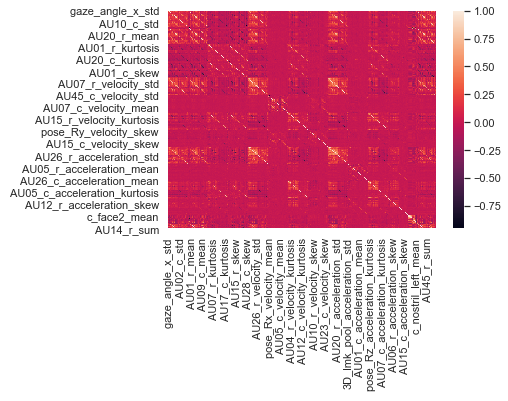

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.matrix as smatrix

sns.set()



#sns.heatmap(corr)
sns.heatmap(corr)